<a href="https://colab.research.google.com/github/Saicharan39/Machine-Learning/blob/main/soil_profiling_and_crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install tensorflow
!pip install keras

In [4]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,MaxPool2D,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img_width,img_height=224,224
batch_size=32
epochs=25

In [6]:
path='/content/drive/MyDrive/Soil_Dataset'




In [7]:
train_data_dir='/content/drive/MyDrive/Soil_Dataset/Train'
test_data_dir='/content/drive/MyDrive/Soil_Dataset/Test'

In train data there are 4 subfolders

In [8]:
from glob import glob


directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/*'

#this is used to consider all 4 folders into a single directory
file_list = glob(directory_path)

num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 4


In [9]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')

The number of files in the directory is: 204


In [10]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 204


In [11]:

from glob import glob

glob('/content/drive/MyDrive/Soil_Dataset/Train/*')



['/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Red_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Black_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil']

In [12]:
labels=['Alluvial_Soil','Black_Soil','Clay_Soil','Red_Soil']

In [13]:
def show_soil(path):
 im=cv2.imread(path)
 im_resized=cv2.resize(im,(img_height,img_width),interpolation=cv2.INTER_LINEAR)
 plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
 plt.show()

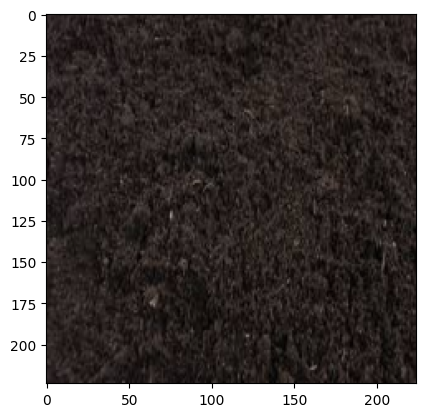

In [14]:
show_soil('/content/drive/MyDrive/Soil_Dataset/Test/Black_Soil/Black_5.jpg')

In [15]:

trainGen=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
testGen=ImageDataGenerator(rescale=1./255)



In [16]:
train=trainGen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size,shuffle=True)
test=testGen.flow_from_directory(test_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size)


Found 816 images belonging to 4 classes.
Found 211 images belonging to 4 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall

img_height = 224
img_width = 224

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=(img_height, img_width, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

# Compile the model with metrics
model.compile(loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if your labels are integers
              optimizer='adam',
              metrics=['accuracy', Precision(), Recall()])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        1

f

In [18]:
epochs=25


model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/25
26/26 [==============================] - 325s 12s/step - loss: 1.1397 - accuracy: 0.4926 - precision: 0.6794 - recall: 0.2390 - val_loss: 0.7557 - val_accuracy: 0.5924 - val_precision: 0.9636 - val_recall: 0.2512
Epoch 2/25
26/26 [==============================] - 255s 10s/step - loss: 0.6956 - accuracy: 0.7083 - precision: 0.7718 - recall: 0.6176 - val_loss: 0.7775 - val_accuracy: 0.7867 - val_precision: 0.7721 - val_recall: 0.4976
Epoch 3/25
26/26 [==============================] - 253s 10s/step - loss: 0.5877 - accuracy: 0.7549 - precision: 0.8110 - recall: 0.6679 - val_loss: 0.5200 - val_accuracy: 0.8152 - val_precision: 0.8413 - val_recall: 0.7536
Epoch 4/25
26/26 [==============================] - 253s 10s/step - loss: 0.4112 - accuracy: 0.8358 - precision: 0.8521 - recall: 0.8051 - val_loss: 0.3896 - val_accuracy: 0.8578 - val_precision: 0.8802 - val_recall: 0.8009
Epoch 5/25
26/26 [==============================] - 255s 10s/step - loss: 0.4181 - accuracy: 0.8333 - pr

In [19]:


model.history.history.keys()


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [20]:
train_loss=model.history.history['loss']
train_loss

[1.139661192893982,
 0.6956296563148499,
 0.5877045392990112,
 0.41123971343040466,
 0.4180722236633301,
 0.35498058795928955,
 0.3712307810783386,
 0.309870183467865,
 0.29237884283065796,
 0.27842116355895996,
 0.27600353956222534,
 0.21142448484897614,
 0.23271913826465607,
 0.19935834407806396,
 0.19817791879177094,
 0.17464834451675415,
 0.17354576289653778,
 0.164491206407547,
 0.22422103583812714,
 0.1745084673166275,
 0.23733635246753693,
 0.18497227132320404,
 0.16310104727745056,
 0.16428805887699127,
 0.17929261922836304]

In [21]:
train_acc=model.history.history['accuracy']
train_acc

[0.49264705181121826,
 0.7083333134651184,
 0.7549019455909729,
 0.8357843160629272,
 0.8333333134651184,
 0.8651960492134094,
 0.8615196347236633,
 0.8799019455909729,
 0.8995097875595093,
 0.9019607901573181,
 0.8823529481887817,
 0.9154411554336548,
 0.9166666865348816,
 0.9276960492134094,
 0.9325980544090271,
 0.936274528503418,
 0.9350489974021912,
 0.9375,
 0.9215686321258545,
 0.9473039507865906,
 0.9203431606292725,
 0.9252451062202454,
 0.9338235259056091,
 0.9424019455909729,
 0.9399510025978088]

In [22]:
test_loss=model.history.history['val_loss']
test_loss

[0.7556831240653992,
 0.777452826499939,
 0.5199814438819885,
 0.3896495997905731,
 0.3636282980442047,
 0.3079437017440796,
 0.3774068355560303,
 0.2984483242034912,
 0.25912538170814514,
 0.2651791274547577,
 0.3656143546104431,
 0.6392449140548706,
 0.25490859150886536,
 0.24349190294742584,
 0.32776132225990295,
 0.38007670640945435,
 0.22166267037391663,
 0.3748852014541626,
 0.23122480511665344,
 0.35390788316726685,
 0.22655832767486572,
 0.5133119821548462,
 0.35497891902923584,
 0.3796716630458832,
 0.2283814251422882]

In [23]:
test_acc=model.history.history['val_accuracy']
test_acc

[0.5924170613288879,
 0.7867298722267151,
 0.8151658773422241,
 0.8578199148178101,
 0.9052132964134216,
 0.9099525809288025,
 0.900473952293396,
 0.8957346081733704,
 0.9146919250488281,
 0.9146919250488281,
 0.900473952293396,
 0.8341231942176819,
 0.9194312691688538,
 0.928909957408905,
 0.900473952293396,
 0.8957346081733704,
 0.9241706132888794,
 0.8767772316932678,
 0.9431279897689819,
 0.9146919250488281,
 0.9383886456489563,
 0.8578199148178101,
 0.900473952293396,
 0.8909952640533447,
 0.9099525809288025]

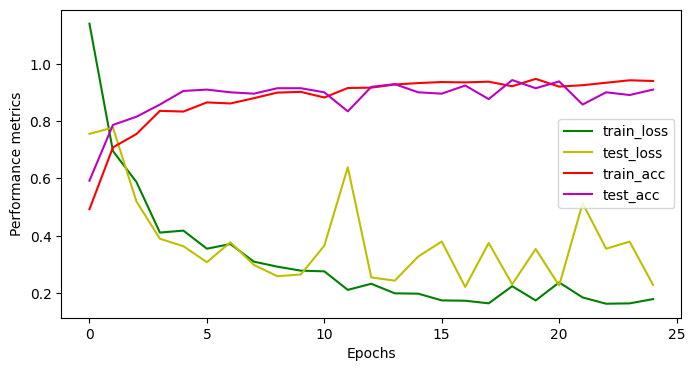

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming epochs is defined somewhere in your code
epochs = 25

# Assuming train_loss, test_loss, train_acc, and test_acc are defined somewhere in your code
# Ensure they have the same length as the number of epochs
train_loss = train_loss[:epochs]
test_loss = test_loss[:epochs]
train_acc = train_acc[:epochs]
test_acc = test_acc[:epochs]

plt.figure(figsize=(8, 4))
plt.plot(np.arange(epochs), train_loss, color='g', label='train_loss')
plt.plot(np.arange(epochs), test_loss, color='y', label='test_loss')
plt.plot(np.arange(epochs), train_acc, color='r', label='train_acc')
plt.plot(np.arange(epochs), test_acc, color='m', label='test_acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Performance metrics')

plt.show()



In [25]:
acc= model.evaluate(test)
print('Test accuracy:', acc)
#print('Test Acc:', acc)




7/7 [==============================] - 16s 2s/step - loss: 0.2284 - accuracy: 0.9100 - precision: 0.9175 - recall: 0.8957
Test accuracy: [0.2283814251422882, 0.9099525809288025, 0.917475700378418, 0.8957346081733704]


Prediction System


1/1 [==============================] - 0s 173ms/step


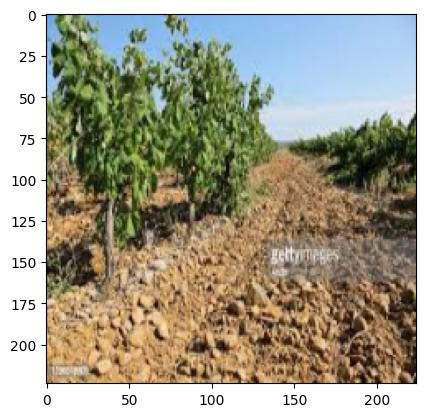

Predicted Class: Alluvial_Soil
Probability: 1.0


In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

def predict_soil_function(path, model, class_labels, img_height=224, img_width=224):
    # Load and preprocess the image
    img = image.load_img(path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_probability = predictions[0][predicted_class_index]

    # Display the image
    im_resized = cv2.resize(cv2.imread(path), (img_height, img_width), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

    # Print predicted class and its probability
    predicted_class = class_labels[predicted_class_index]
    print('Predicted Class:', predicted_class)
    print('Probability:', predicted_probability)

    return predicted_class, predicted_probability

# Assuming you already have the 'model' loaded and class labels defined
# model = ...
class_labels = ['Alluvial_Soil', 'Black_Soil', 'Clay_Soil', 'Red_Soil']

predict_soil_variable = '/content/drive/MyDrive/Soil_Dataset/Test/Alluvial_Soil/images81.jpg'
predicted_class, predicted_probability = predict_soil_function(predict_soil_variable, model, class_labels)



Crop recommendation

In [28]:
import pandas as pd

In [29]:
crop=pd.read_csv('/content/drive/MyDrive/dataset.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,soil,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,alluvial,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,black,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,alluvial,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,alluvial,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,red,rice


In [30]:
crop.shape


(2200, 9)

In [31]:
crop.duplicated().sum()

0

In [32]:
crop.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [33]:
cor=crop.corr()
cor

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

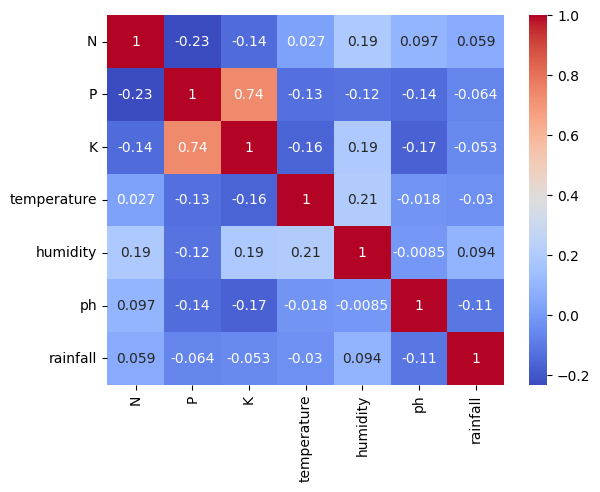

In [34]:
import seaborn as sns
sns.heatmap(cor,annot=True,cbar=True,cmap='coolwarm')

In [35]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

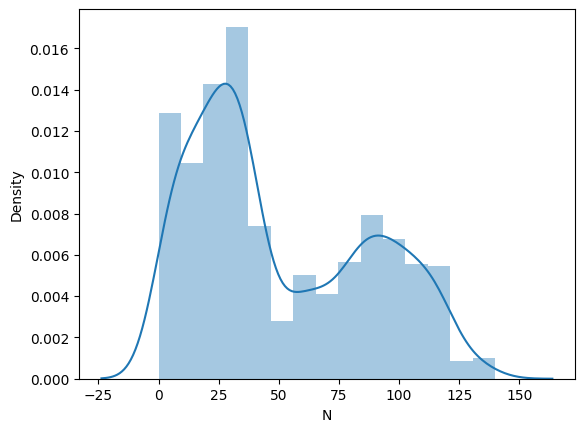

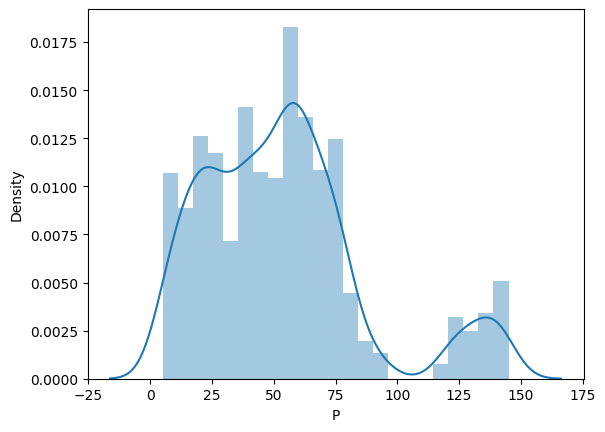

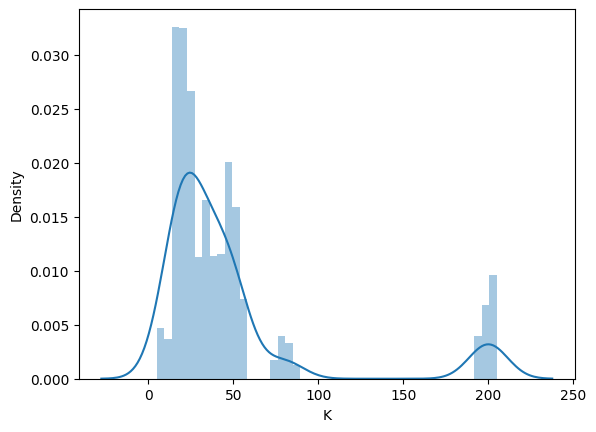

In [36]:

import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()
import matplotlib.pyplot as plt
sns.distplot(crop['K'])
plt.show()

In [37]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,soil,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,alluvial,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,black,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,alluvial,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,alluvial,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,red,rice


Prediction model


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,soil,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,alluvial,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,black,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,alluvial,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,alluvial,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,red,rice


In [40]:
if df['N'].all()>90:
    print(df['N'])


In [41]:
x = df.drop(['label'], axis=1)
y = df['label']

print(x)


        N   P   K  temperature   humidity        ph    rainfall      soil
0      90  42  43    20.879744  82.002744  6.502985  202.935536  alluvial
1      85  58  41    21.770462  80.319644  7.038096  226.655537     black
2      60  55  44    23.004459  82.320763  7.840207  263.964248  alluvial
3      74  35  40    26.491096  80.158363  6.980401  242.864034  alluvial
4      78  42  42    20.130175  81.604873  7.628473  262.717340       red
...   ...  ..  ..          ...        ...       ...         ...       ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507       red
2196   99  15  27    27.417112  56.636362  6.086922  127.924610       red
2197  118  33  30    24.131797  67.225123  6.362608  173.322839       red
2198  117  32  34    26.272418  52.127394  6.758793  127.175293     black
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  alluvial

[2200 rows x 8 columns]


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, random_state = 1)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1650, 8)
(1650,)
(550, 8)
(550,)


Testing on different models

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Define the columns that need preprocessing
numeric_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
categorical_features = ['soil']

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=2),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
}

for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} with accuracy: {accuracy}")


Logistic Regression with accuracy: 0.9672727272727273
Naive Bayes with accuracy: 0.9927272727272727
Support Vector Machine with accuracy: 0.98
K-Nearest Neighbors with accuracy: 0.9145454545454546
Decision Tree with accuracy: 0.9781818181818182
Random Forest with accuracy: 0.9945454545454545
Bagging with accuracy: 0.9945454545454545
AdaBoost with accuracy: 0.18181818181818182
Gradient Boosting with accuracy: 0.9872727272727273
Extra Trees with accuracy: 0.990909090909091


In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are DataFrames
numeric_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
categorical_features = ['soil']

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Update x_train and x_test by applying the preprocessor
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

# Now, you can use the preprocessed data to train your models


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming x_train, x_test, y_train, y_test are already defined

# Identify categorical columns
categorical_cols = ['soil']  # Add other categorical columns if present

# Create a column transformer with one-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and the classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=2))
])

# Train and evaluate the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the classifier is " + str(acc))


Accuracy of the classifier is 0.9781818181818182


In [47]:
import joblib


In [48]:
file_name = 'crop_app'

In [49]:
joblib.dump(model,'crop_app')



['crop_app']

In [50]:
app = joblib.load('crop_app')

In [59]:
import pandas as pd

# Your input list
arr = [[40, 30, 27, 43.44, 73.32, 7.84, 163.09, 'red']]

# Column names corresponding to your features
columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'soil']

# Create a DataFrame from the input list with specified column names
input_df = pd.DataFrame(arr, columns=columns)

# Use the ColumnTransformer on the DataFrame

result = app.predict(input_df)
print(result)


['mango']
